# OpenMP Parrallel programming

---

Análisis de programa paralelo en C con OpenMP.

Objetivo: Paralelizar el cálculo del número. Pi


Tiempo del programa en serie: Programa original que calcula Pi con 2,000,000,000 steps, se ejecuta en **15.456091** segundos.

Programa en serie: *serialpi.c*

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
x = THREADS
labels = ["SPMD", "PAD", "Critical", "Atomic", "Reduction","Static", "Dynamic", "Guided", "Auto"]
colors = ["red", "blue", "green", "orange", "yellow", "cyan", "magenta", "yellowgreen", "brown"]

In [26]:
THREADS = [1,2,3,4,5,6,7,8,9,10]
SPMD = [15.536600, 13.687354, 10.624500, 7.231924, 6.026867, 5.368290, 4.944620, 4.561634, 5.051159, 4.617499]
PAD8 = [15.201718, 7.678169, 5.136876, 3.870959, 3.141101, 2.658079, 2.328583, 2.128771, 2.188689,2.085791]
CRITICAL = [15.047549, 7.651524, 5.147578, 3.919411, 3.141793, 2.702527, 2.360716, 2.157638, 2.083769, 2.117314]
ATOMIC = [15.108168,7.708026, 5.163800, 3.897546, 3.157263, 2.691687, 2.363192, 2.232644, 2.158442, 2.125813]
FOR_RED = [14.928315, 7.600700, 5.129961, 3.886641, 3.144383, 2.689834, 2.386184, 2.209187, 2.106221, 2.085597]
FOR_STATIC = [14.926479, 7.564087, 5.346894, 3.932787, 3.148582, 2.738736, 2.419123, 2.228919, 2.113450, 2.102283]
FOR_DYN = [14.934173, 13.131290, 8.952804, 7.013373, 6.974542, 6.956808, 6.877257, 7.215588, 6.954309, 7.000751]
FOR_GUID = [14.922482, 7.609808, 5.134644, 3.863743, 3.174503, 2.661688, 2.342356, 2.148601, 2.129347, 2.106006]
FOR_AUTO = [15.047196, 7.554140, 5.150123, 3.861816, 3.151446, 2.702407, 2.325157, 2.098177, 2.117401, 2.201950]

In [27]:
table = pd.DataFrame({'Threads': THREADS,
                      'SPMD': SPMD,
                      'PAD8': PAD8,
                      'CRITICAL': CRITICAL,
                      'ATOMIC': ATOMIC,
                      'For_Reduction': FOR_RED,
                      'For_Static': FOR_STATIC,
                      'For_Dynamic': FOR_DYN,
                      'For_Guided': FOR_GUID,
                      'For_Auto': FOR_AUTO
                      })

In [28]:
print("----- Tabla de tiempos de ejecución en segundos -----")
table

----- Tabla de tiempos de ejecución en segundos -----


,Threads,SPMD,PAD8,CRITICAL,ATOMIC,For_Reduction,For_Static,For_Dynamic,For_Guided,For_Auto
0,1,15.536600,15.201718,15.047549,15.108168,14.928315,14.926479,14.934173,14.922482,15.047196
1,2,13.687354,7.678169,7.651524,7.708026,7.600700,7.564087,13.131290,7.609808,7.554140
2,3,10.624500,5.136876,5.147578,5.163800,5.129961,5.346894,8.952804,5.134644,5.150123
3,4,7.231924,3.870959,3.919411,3.897546,3.886641,3.932787,7.013373,3.863743,3.861816
4,5,6.026867,3.141101,3.141793,3.157263,3.144383,3.148582,6.974542,3.174503,3.151446
5,6,5.368290,2.658079,2.702527,2.691687,2.689834,2.738736,6.956808,2.661688,2.702407
6,7,4.944620,2.328583,2.360716,2.363192,2.386184,2.419123,6.877257,2.342356,2.325157
7,8,4.561634,2.128771,2.157638,2.232644,2.209187,2.228919,7.215588,2.148601,2.098177
8,9,5.051159,2.188689,2.083769,2.158442,2.106221,2.113450,6.954309,2.129347,2.117401
9,10,4.617499,2.085791,2.117314,2.125813,2.085597,2.102283,7.000751,2.106006,2.201950


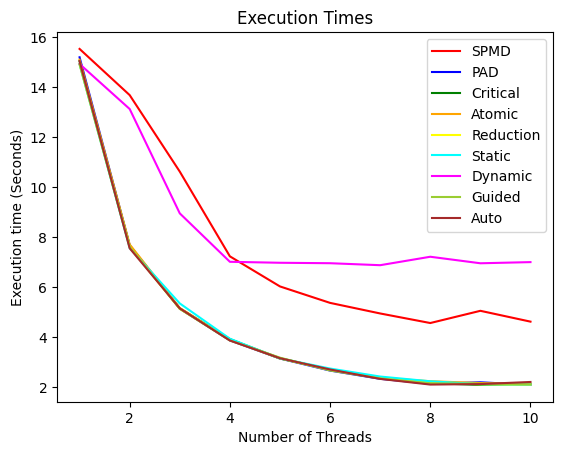

In [46]:
plt.title("Execution Times")
plt.xlabel("Number of Threads")
plt.ylabel("Execution time (Seconds)")
for i in range(9):
  y = table[table.columns[i+1]]  # Select the i-th column as the y-values
  plt.plot(x, y, color=colors[i], label=labels[i])

plt.legend()
plt.show()

Tablas de Métricas

Métricas: *Speedup, Efficiency, parallelizability*

In [31]:
# SPEEDUP
serial_time = 15.456091 #seconds

spmd_speedup, spmd_eff, spmd_par = [0]*10, [0]*10, [0]*10
pad_speedup, pad_eff, pad_par = [0]*10, [0]*10, [0]*10
critical_speedup, critical_eff, critical_par = [0]*10, [0]*10, [0]*10
atomic_speedup, atomic_eff, atomic_par = [0]*10, [0]*10, [0]*10
reduction_speedup, reduction_eff, reduction_par = [0]*10, [0]*10, [0]*10
static_speedup, static_eff, static_par = [0]*10, [0]*10, [0]*10
dynamic_speedup, dynamic_eff, dynamic_par = [0]*10, [0]*10, [0]*10
guided_speedup, guided_eff, guided_par = [0]*10, [0]*10, [0]*10
auto_speedup, auto_eff, auto_par = [0]*10, [0]*10, [0]*10

for i in range(10):
  spmd_speedup[i] = serial_time / SPMD[i]
  spmd_eff[i] = np.round((spmd_speedup[i]/THREADS[i]), 2)
  spmd_par[i] = SPMD[0]/SPMD[i]

  pad_speedup[i] = serial_time / PAD8[i]
  pad_eff[i] = np.round((pad_speedup[i]/THREADS[i]), 2)
  pad_par[i] = PAD8[0]/PAD8[i]

  critical_speedup[i] = serial_time / CRITICAL[i]
  critical_eff[i] = np.round((critical_speedup[i]/THREADS[i]), 2)
  critical_par[i] = CRITICAL[0]/CRITICAL[i]

  atomic_speedup[i] = serial_time / ATOMIC[i]
  atomic_eff[i] = np.round((atomic_speedup[i]/THREADS[i]), 2)
  atomic_par[i] = ATOMIC[0]/ATOMIC[i]

  reduction_speedup[i] = serial_time / FOR_RED[i]
  reduction_eff[i] = np.round((reduction_speedup[i]/THREADS[i]), 2)
  reduction_par[i] = FOR_RED[0]/FOR_RED[i]

  static_speedup[i] = serial_time / FOR_STATIC[i]
  static_eff[i] = np.round((static_speedup[i]/THREADS[i]), 2)
  static_par[i] = FOR_STATIC[0]/FOR_STATIC[i]

  dynamic_speedup[i] = serial_time / FOR_DYN[i]
  dynamic_eff[i] = np.round((dynamic_speedup[i]/THREADS[i]), 2)
  dynamic_par[i] = FOR_DYN[0]/FOR_DYN[i]

  guided_speedup[i] = serial_time / FOR_GUID[i]
  guided_eff[i] = np.round((guided_speedup[i]/THREADS[i]), 2)
  guided_par[i] = FOR_GUID[0]/FOR_GUID[i]

  auto_speedup[i] = serial_time / FOR_AUTO[i]
  auto_eff[i] = np.round((auto_speedup[i]/THREADS[i]), 2)
  auto_par[i] = FOR_AUTO[0]/FOR_AUTO[i]



In [61]:
print("----- Tabla de Speedup -----")
speedup_table = pd.DataFrame({'Threads': THREADS,
                              'SPMD': spmd_speedup,
                              'PAD8': pad_speedup,
                              'CRITICAL': critical_speedup,
                              'ATOMIC': atomic_speedup,
                              'For_Reduction': reduction_speedup,
                              'For_Static': static_speedup,
                              'For_Dynamic': dynamic_speedup,
                              'For_Guided': guided_speedup,
                              'For_Auto': auto_speedup})

speedup_table

----- Tabla de Speedup -----


,Threads,SPMD,PAD8,CRITICAL,ATOMIC,For_Reduction,For_Static,For_Dynamic,For_Guided,For_Auto
0,1,0.994818,1.016733,1.027150,1.023029,1.035354,1.035481,1.034948,1.035759,1.027174
1,2,1.129224,2.012992,2.020002,2.005194,2.033509,2.043352,1.177043,2.031075,2.046042
2,3,1.454759,3.008850,3.002595,2.993162,3.012906,2.890667,1.726397,3.010158,3.001111
3,4,2.137203,3.992833,3.943473,3.965596,3.976722,3.930061,2.203803,4.000290,4.002286
4,5,2.564532,4.920597,4.919513,4.895408,4.915461,4.908905,2.216073,4.868822,4.904444
5,6,2.879146,5.814760,5.719125,5.742158,5.746113,5.643513,2.221722,5.806876,5.719379
6,7,3.125840,6.637552,6.547205,6.540345,6.477326,6.389130,2.247421,6.598523,6.647332
7,8,3.388280,7.260570,7.163431,6.922775,6.996280,6.934344,2.142042,7.193560,7.366438
8,9,3.059910,7.061803,7.417373,7.160763,7.338304,7.313204,2.222520,7.258606,7.299558
9,10,3.347286,7.410182,7.299858,7.270673,7.410871,7.352051,2.207776,7.339054,7.019274


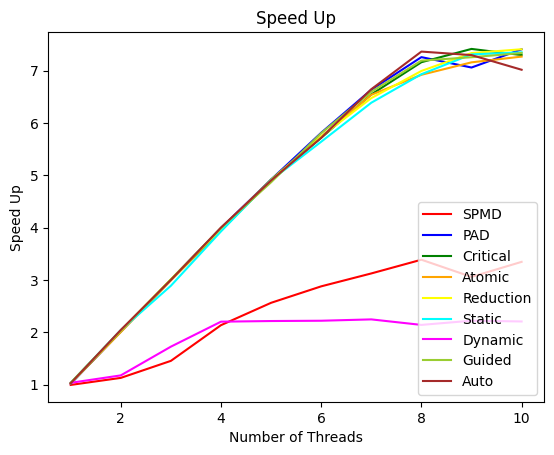

In [62]:
plt.title("Speed Up")
plt.xlabel("Number of Threads")
plt.ylabel("Speed Up")
for i in range(9):
  y = speedup_table[speedup_table.columns[i+1]]  # Select the i-th column as the y-values
  plt.plot(x, y, color=colors[i], label=labels[i])

plt.legend(loc="lower right")
plt.show()

In [35]:
print("----- Tabla de Eficiencia -----")
efficiency_table = pd.DataFrame({'Threads': THREADS,
                              'SPMD': spmd_eff,
                              'PAD8': pad_eff,
                              'CRITICAL': critical_eff,
                              'ATOMIC': atomic_eff,
                              'For_Reduction': reduction_eff,
                              'For_Static': static_eff,
                              'For_Dynamic': dynamic_eff,
                              'For_Guided': guided_eff,
                              'For_Auto': auto_eff})

efficiency_table

----- Tabla de Eficiencia -----


,Threads,SPMD,PAD8,CRITICAL,ATOMIC,For_Reduction,For_Static,For_Dynamic,For_Guided,For_Auto
0,1,0.99,1.02,1.03,1.02,1.04,1.04,1.03,1.04,1.03
1,2,0.56,1.01,1.01,1.00,1.02,1.02,0.59,1.02,1.02
2,3,0.48,1.00,1.00,1.00,1.00,0.96,0.58,1.00,1.00
3,4,0.53,1.00,0.99,0.99,0.99,0.98,0.55,1.00,1.00
4,5,0.51,0.98,0.98,0.98,0.98,0.98,0.44,0.97,0.98
5,6,0.48,0.97,0.95,0.96,0.96,0.94,0.37,0.97,0.95
6,7,0.45,0.95,0.94,0.93,0.93,0.91,0.32,0.94,0.95
7,8,0.42,0.91,0.90,0.87,0.87,0.87,0.27,0.90,0.92
8,9,0.34,0.78,0.82,0.80,0.82,0.81,0.25,0.81,0.81
9,10,0.33,0.74,0.73,0.73,0.74,0.74,0.22,0.73,0.70


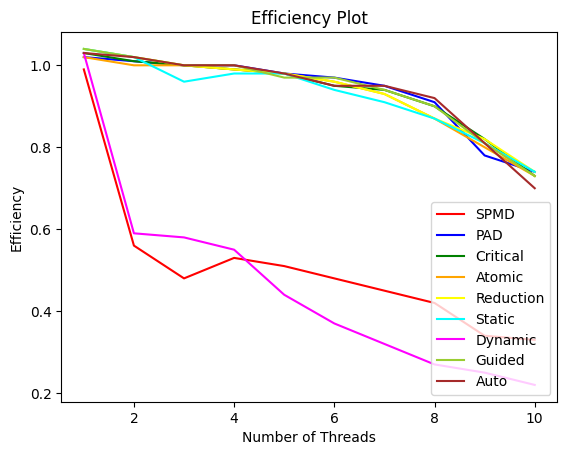

In [63]:
plt.title("Efficiency Plot")
plt.xlabel("Number of Threads")
plt.ylabel("Efficiency")
for i in range(9):
  y = efficiency_table[efficiency_table.columns[i+1]]  # Select the i-th column as the y-values
  plt.plot(x, y, color=colors[i], label=labels[i])

plt.legend(loc="lower right")
plt.show()

In [36]:
print("----- Tabla de Paralelicibilidad -----")
parallelizability_table = pd.DataFrame({'Threads': THREADS,
                              'SPMD': spmd_par,
                              'PAD8': pad_par,
                              'CRITICAL': critical_par,
                              'ATOMIC': atomic_par,
                              'For_Reduction': reduction_par,
                              'For_Static': static_par,
                              'For_Dynamic': dynamic_par,
                              'For_Guided': guided_par,
                              'For_Auto': auto_par})

parallelizability_table

----- Tabla de Paralelicibilidad -----


,Threads,SPMD,PAD8,CRITICAL,ATOMIC,For_Reduction,For_Static,For_Dynamic,For_Guided,For_Auto
0,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2,1.135106,1.979862,1.966608,1.960057,1.964071,1.973335,1.137297,1.960954,1.991914
2,3,1.462337,2.959331,2.923229,2.925785,2.910025,2.791617,1.668100,2.906235,2.921716
3,4,2.148336,3.927119,3.839237,3.876328,3.840930,3.795395,2.129385,3.862183,3.896404
4,5,2.577890,4.839615,4.789478,4.785210,4.747613,4.740699,2.141241,4.700730,4.774696
5,6,2.894143,5.719062,5.567955,5.612899,5.549902,5.450134,2.146699,5.606398,5.568072
6,7,3.142122,6.528313,6.374146,6.393119,6.256146,6.170203,2.171530,6.370715,6.471475
7,8,3.405929,7.141077,6.974084,6.766940,6.757380,6.696735,2.069710,6.945209,7.171557
8,9,3.075849,6.945582,7.221313,6.999571,7.087725,7.062613,2.147470,7.008009,7.106446
9,10,3.364722,7.288227,7.106905,7.107007,7.157814,7.100128,2.133224,7.085679,6.833578


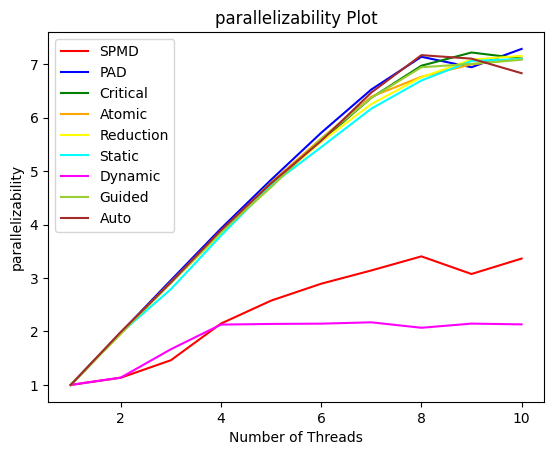

In [55]:
plt.title("parallelizability Plot")
plt.xlabel("Number of Threads")
plt.ylabel("parallelizability")
for i in range(9):
  y = parallelizability_table[parallelizability_table.columns[i+1]]  # Select the i-th column as the y-values
  plt.plot(x, y, color=colors[i], label=labels[i])

plt.legend()
plt.show()